

![picture](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/pytorch.png)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

In [2]:
import torch
print(torch.__version__)

2.1.0+cu121


# Autograd

PyTorch uses a technique called automatic differentiation. It records all the operations that we are performing (computational graph) and replays it backward to compute gradients

The autograd package provides automatic differentiation for all operations on Tensors

In [3]:
# requires_grad = True -> tracks all operations on the tensor.
torch.manual_seed(42)

x = torch.randn(3, requires_grad=True)
print(x, '\n')

y = x + 2  #Since y was created as a result of an operation, it has a grad_fn attribute.


print(y)

tensor([0.3367, 0.1288, 0.2345], requires_grad=True) 

tensor([2.3367, 2.1288, 2.2345], grad_fn=<AddBackward0>)


In [4]:
#print(y.grad_fn)

In [5]:
#Further operation
z = y * y * 3
print(z, '\n')

h = z.mean()
print(h)

tensor([16.3804, 13.5955, 14.9785], grad_fn=<MulBackward0>) 

tensor(14.9848, grad_fn=<MeanBackward0>)


To  compute the gradients we can call ***.backward()*** and have all the gradients computed automatically.

The gradient for this tensor will be accumulated into .grad attribute.
It is the partial derivate of the function w.r.t. the tensor.

In [6]:
# copute dh/dx
h.backward() #if you run this cell twice will receive and error, since we will be trying to backward through the graph a second time

#display the values of the gradient
print(x.grad)

tensor([4.6734, 4.2576, 4.4689])


### Exercise

Try to compute this gradient manually and copare the result with x.grad


In [7]:
## WRITE YOU CODE HERE
2*(x+2)

tensor([4.6734, 4.2576, 4.4689], grad_fn=<MulBackward0>)

### Note:
* During the forward pass, PyTorch computes the forward operations and builds a computation graph.
* During the backward pass (backpropagation), PyTorch uses this graph to compute gradients by applying the chain rule.
* By default, PyTorch only retains gradients for leaf nodes in the computation graph (input tensors or parameters with requires_grad=True). Intermediate tensors, unless specified otherwise, have their gradients discarded after the backward pass to save memory.

`retain_grad()` method is used to indicate that gradients for a particular tensor should be retained during backpropagation, even if the default behavior is to discard them

#### Illustration

In [8]:
x = torch.tensor([2.0], requires_grad=True)
y = x * 3
z = y**2

# Retain gradients for the intermediate tensor 'y' i.e the derivative w.r.t  y
y.retain_grad()

# Perform more operations
w = z.sum()

# Perform backward pass
w.backward() # dw/dx=dw/dz * dz/dy * dy/dx

# Access gradients
print(x.grad)  # Gradient for x
print(y.grad)  # Gradient for y (retained) = dz/dy=2*y


tensor([36.])
tensor([12.])


## Zeros gradient

backward() accumulates the gradient for this tensor into .grad attribute. We need to be careful during optimization !!! Use .zero_() to empty the gradients before a new optimization step so that the parameter will be updated correctly. Otherwise, the gradient would be a combination of the old gradient, which we have already used to update our model parameters, and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum

In [9]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()

    print(weights.grad)

# print(weights)
# print(model_output)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [10]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()

    print(weights.grad)

    # this is important! It affects the final weights & output
    weights.grad.zero_()

# print(weights)
# print(model_output)

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

Note:
Three options to stop/prevent pytorch for tracking the gradient for some operation.

for example during the training when we want to update the weights, this operation should not be part of the gradient computation
- option 1: `requires_grad_(False)`
- option 2: `detach()`, this will create a new tensor that doesn't require the gradient
- option 3: is to wrap it into a with statement: `with torch.no_grad():`


#### Illustration

In [11]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x

loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)


# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

## Pytorch optim module

The Optim module in PyTorch has pre-written codes for most of the optimizers that are used while building a neural network. We just have to import them and then they can be used to build models.

In [12]:
# importing the optim module
from torch import optim

# sgd
## SGD = optim.SGD(model.parameters(), lr=learning_rate)

# adam
## adam = optim.Adam(model.parameters(), lr=learning_rate)



# During training:
# optimizer.step(): to update the weights
# optimizer.zero_grad(): to zero the gradients

## Torch nn Module

It provides an easy and modular way to build and train simple or complex neural networks using Torch:




*   Simple layers: nn.Linear
*   Convolutional layers: nn.Conv1D, nn.Conv2D, ...
*   Pooling layers: nn.MaxPool1d, nn.MaxPool2d, ....
*   Criterion: nn.MSELoss, nn.CrossEntropyLoss
*   Activation functions:  nn.ReLU, nn.Sigmoid, ...
nn.RNN, nn.LSTM
*   ....








In [13]:
import torch.nn as nn

# Linear regression with pytorch

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

### Prepare data

In [15]:
#Generate a regression dataset using sklearn
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [16]:
print(n_samples, n_features)

100 1


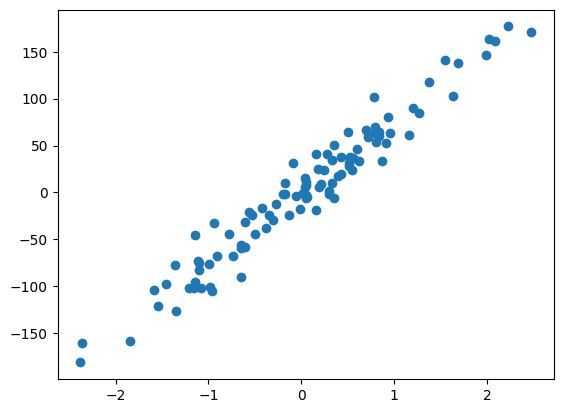

In [17]:
plt.scatter(X,y)

### Model

In [18]:
#Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [19]:
model

Linear(in_features=1, out_features=1, bias=True)

In [20]:
for name, w in model.named_parameters():
  print(name)
  print(w)

weight
Parameter containing:
tensor([[0.8815]], requires_grad=True)
bias
Parameter containing:
tensor([-0.7336], requires_grad=True)


### Loss and optimizer

In [21]:
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training

In [22]:
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)

    ##compute the loss between your prediction and the true y
    loss = criterion(y_predicted,y)

    # Backward pass
    loss.backward()

    ## update parameters
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 3972.3162
epoch: 20, loss = 2800.3962
epoch: 30, loss = 2001.8270
epoch: 40, loss = 1457.5454
epoch: 50, loss = 1086.4983
epoch: 60, loss = 833.4947
epoch: 70, loss = 660.9446
epoch: 80, loss = 543.2404
epoch: 90, loss = 462.9331
epoch: 100, loss = 408.1303


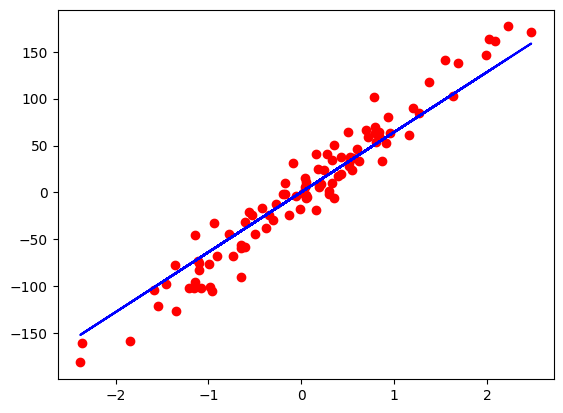

In [23]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Exercise: Implement Logistic regression using PyTorch

In [24]:
## FILL THE MISSING CODE ##

In [25]:
# Step 1: Prepare the dataset (We are going to use the breast cancer dataset- a binary classification problem)

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

#Get the number of features and the number of samples
samples, features = X.shape

#Scale X to have 0 mean and unit variance

X_centered = (X - X.mean(axis=0))/np.std(X, axis=0)

#Split the data into train and test sets (X_train, y_train, X_test, y_test)
def train_test_split(X,y):
  '''
  this function takes as input the sample X and the corresponding features y
  and output the training and test set
  '''
  np.random.seed(0)

  train_size = 0.8
  n = int(len(X)*train_size)
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  train_idx = indices[: n]
  test_idx = indices[n:]
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  return X_train, y_train, X_test, y_test

X_train, y_train, X_test,y_test= train_test_split(X_centered,y)


# Convert X_train, y_train, X_test, y_test into tensor
X_train1 = torch.from_numpy(X_train.astype("float32"))
y_train1 = torch.from_numpy(y_train.astype("float32"))
X_test1 = torch.from_numpy(X_test.astype("float32"))
y_test1 = torch.from_numpy(y_test.astype("float32"))

# Reshape y_train and y_test if needed

y_train1 = y_train1.reshape(-1,1)
y_test1 = y_test1.reshape(-1,1)

X_train.shape

(455, 30)

In [26]:
#Step 2: Design the model

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features,1)

    def forward(self, x):
        # use torch.sigmoid to get the prbabilities values
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


model = LogisticRegression(features)

In [27]:
#Step 3: Loss and optimizer
num_epochs = 200
learning_rate = 0.01
criterion = nn.BCELoss() #Check online how to define the binary cross entropy using nn
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)#use SGD

In [28]:
# Step 4: Training loop

for epoch in range(num_epochs):

    # Forward pass and loss
    y_pred = model(X_train1)
    loss = criterion(y_pred,y_train1)

    # Backward pass
    loss.backward()

    # update
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test1)
    y_predicted_cls = [0 if p <=0.5 else 1 for p in y_predicted] #use threshold=0.5 to define the classes
    accuracy =( y_predicted_cls==y_test1.numpy().flatten()).sum() / y_test1.shape[0]
    print(f'accuracy: {accuracy.item():.4f}')

epoch: 10, loss = 0.8064
epoch: 20, loss = 0.6291
epoch: 30, loss = 0.5222
epoch: 40, loss = 0.4525
epoch: 50, loss = 0.4035
epoch: 60, loss = 0.3669
epoch: 70, loss = 0.3384
epoch: 80, loss = 0.3155
epoch: 90, loss = 0.2967
epoch: 100, loss = 0.2808
epoch: 110, loss = 0.2673
epoch: 120, loss = 0.2556
epoch: 130, loss = 0.2453
epoch: 140, loss = 0.2363
epoch: 150, loss = 0.2282
epoch: 160, loss = 0.2210
epoch: 170, loss = 0.2144
epoch: 180, loss = 0.2085
epoch: 190, loss = 0.2031
epoch: 200, loss = 0.1982
accuracy: 0.9825


# Pytorch Dataset

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow us to use pre-loaded datasets as well as our own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data.

Dataset are accessible through  
* TorchVision: for images dataset
* TorchText: for text datasets
* TorchAudio: for audios dataset


Here is an example of how to load the Fashion-MNIST

`root` is the path where the train/test data is stored,

`train` specifies training or test dataset,

`download=True` downloads the data from the internet if it’s not available at root.

`transform` and target_transform specify the feature and label transformations (convert data to tensor, normalize data, ...(see documentation))




In [29]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11566802.61it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212874.97it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3907834.19it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16444993.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [30]:
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=False)
first_batch = next(iter(train_dataloader)) # retrieves the first bacth of the data from the train_dataloader
image, label = first_batch
print(image.shape)
print(label)

torch.Size([16, 1, 28, 28])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


# Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.

In [31]:
#To connect colab to drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
from torch.utils.data import Dataset
import pandas as pd

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = pd.read_csv('/content/drive/MyDrive/AMMI 2023-24/Tutorials/Data/wine.csv')

        xy = xy.to_numpy()
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [33]:
# create dataset
dataset = WineDataset()

# get first sample and unpack
features, labels = dataset[0]
print(features, labels)

print(features.shape)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) tensor([1.], dtype=torch.float64)
torch.Size([13])


# Using pytorch dataset transform on custom dataset

In [34]:
class WineDataset1(Dataset):

    def __init__(self, transform=None):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = pd.read_csv('/content/drive/MyDrive/AMMI 2023-24/Tutorials/Data/wine.csv')

        xy = xy.to_numpy()
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = xy[:, 1:] # size [n_samples, n_features]
        self.y_data = xy[:, [0]] # size [n_samples, 1]
        self.transform = transform

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        sample =  self.x_data[index], self.y_data[index]
        if self.transform:
          sample = self.transform(sample)
        return sample

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, target = sample
    return torch.from_numpy(inputs), torch.from_numpy(target)


In [35]:
# create dataset
dataset = WineDataset1(transform=ToTensor())

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

print(features.shape)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) tensor([1.], dtype=torch.float64)
torch.Size([13])


## Create a Dataloader for our custum dataset

In [36]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True)

# convert to an iterator and look at one  sample
data = next(iter(train_loader))
features, labels = data
print(features, labels)
print(features.shape)

tensor([[1.3670e+01, 1.2500e+00, 1.9200e+00, 1.8000e+01, 9.4000e+01, 2.1000e+00,
         1.7900e+00, 3.2000e-01, 7.3000e-01, 3.8000e+00, 1.2300e+00, 2.4600e+00,
         6.3000e+02],
        [1.2990e+01, 1.6700e+00, 2.6000e+00, 3.0000e+01, 1.3900e+02, 3.3000e+00,
         2.8900e+00, 2.1000e-01, 1.9600e+00, 3.3500e+00, 1.3100e+00, 3.5000e+00,
         9.8500e+02],
        [1.2880e+01, 2.9900e+00, 2.4000e+00, 2.0000e+01, 1.0400e+02, 1.3000e+00,
         1.2200e+00, 2.4000e-01, 8.3000e-01, 5.4000e+00, 7.4000e-01, 1.4200e+00,
         5.3000e+02],
        [1.1760e+01, 2.6800e+00, 2.9200e+00, 2.0000e+01, 1.0300e+02, 1.7500e+00,
         2.0300e+00, 6.0000e-01, 1.0500e+00, 3.8000e+00, 1.2300e+00, 2.5000e+00,
         6.0700e+02]], dtype=torch.float64) tensor([[2.],
        [2.],
        [3.],
        [2.]], dtype=torch.float64)
torch.Size([4, 13])


## Let's see how to train with the dataloader

In [37]:
import math

In [38]:
# Dummy Training loop

num_epochs = 2
num_samples = len(dataset)
n_iterations = math.ceil(num_samples/4)  #number of pass in one epoch

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):

      #forward pass, backward, update ...

        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

Epoch: 1/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/45| Inputs torch.Size([4, 13]) | L

# Saving and loading models

In [39]:
torch.save(model.state_dict(), 'model_weights.pth')

In [40]:
model.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

# Extra reading

https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html

https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html